In [1]:
import pandas as pd
import numpy as np
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import *
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd
import matplotlib.pyplot as plt
%matplotlib notebook

# 7. Aluminum background

In [2]:
albg_t_s = ufloat(3545,1)
albg_N = ufloat(1000,sqrt(1000))
albg_I = albg_N/albg_t_s
albg_I

0.2820874471086037+/-0.008920743227486653

In [3]:
bdt = pd.read_csv('3_BDT.csv')
bdt = bdt.sort_values("d_mm")
bdt_N = unumpy.uarray(bdt.N,np.sqrt(bdt.N))
bdt_t = unumpy.uarray(bdt.t_s,np.ones(bdt.t_s.shape[0]))
bdt_d = unumpy.uarray(bdt.d_mm,bdt.dd_mm)
bdt_I = bdt_N/bdt_t-albg_I
bdt_N,bdt_t,bdt_d,bdt_I

(array([500.0+/-22.360679774997898, 136.0+/-11.661903789690601,
        205.0+/-14.317821063276353, 511.0+/-22.60530911091463,
        201.0+/-14.177446878757825, 161.0+/-12.68857754044952,
        219.0+/-14.798648586948742, 207.0+/-14.38749456993816,
        515.0+/-22.693611435820433, 187.0+/-13.674794331177344,
        407.0+/-20.174241001832016, 502.0+/-22.40535650240808],
       dtype=object),
 array([459.0+/-1.0, 129.0+/-1.0, 174.0+/-1.0, 559.0+/-1.0, 183.0+/-1.0,
        145.0+/-1.0, 175.0+/-1.0, 139.0+/-1.0, 420.0+/-1.0, 146.0+/-1.0,
        372.0+/-1.0, 397.0+/-1.0], dtype=object),
 array([0.1+/-0.005, 0.12+/-0.005, 0.22+/-0.005, 0.25+/-0.005,
        0.33+/-0.005, 0.34+/-0.005, 0.44+/-0.005, 0.52+/-0.005,
        0.6+/-0.005, 1.0+/-0.01, 2.0+/-0.01, 3.0+/-0.01], dtype=object),
 array([0.8072371716277797+/-0.049582943185425235,
        0.7721761187828693+/-0.09120831431509435,
        0.8960734724316262+/-0.08304496617336916,
        0.6320449321400546+/-0.04144337450243656,


<IPython.core.display.Javascript object>


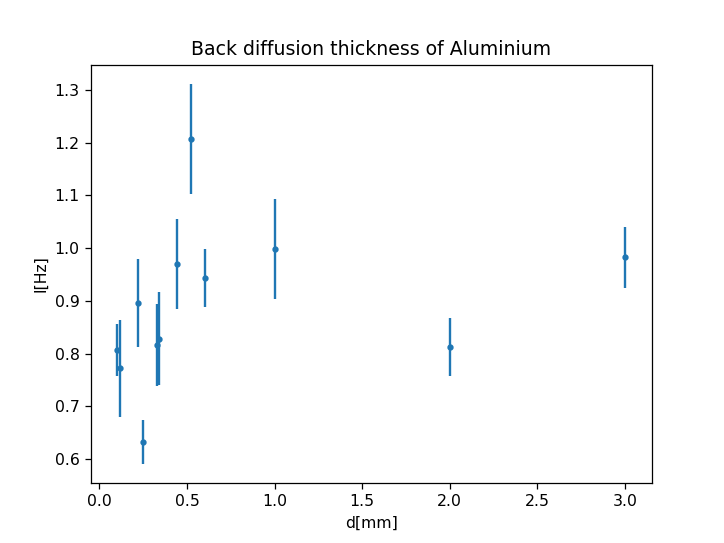

Text(0.5, 1.0, 'Back diffusion thickness of Aluminium')

In [4]:
plt.errorbar(nv(bdt_d),nv(bdt_I),xerr=sd(bdt_d),yerr=sd(bdt_I),fmt='.')
plt.ylabel("I[Hz]")
plt.xlabel("d[mm]")
plt.title("Back diffusion thickness of Aluminium")